In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('Banglore_House_Price.csv') #load the dataset using pandas 
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [62]:
df.shape #displays the number of rows and columns

(13320, 9)

In [63]:
df.isnull().mean()*100 #display the percentage of null values

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [64]:
df['area_type'].value_counts() #check the value count of area type column

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [65]:
df.drop(columns=["availability","area_type","society","balcony"],axis=1,inplace=True) #drop some features which are of no use

In [66]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [67]:
df.isnull().sum() #again check the null values 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [68]:
df.dropna(inplace=True) #drop the rows which contain null values using dropna().
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [69]:
df.shape

(13246, 5)

In [70]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [71]:
df['size'].unique() #check the unique values of size feature

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [72]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))#we write a function to extract only the starting integer values from 
                                                             #the size feature and store it into a new bhk feature

In [73]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [74]:
df.drop(columns=["size"],axis=1,inplace=True)#for updation of dataframe

In [75]:
df.shape

(13246, 5)

In [76]:
df[df.bhk>22]# remove the outliers from the BHK

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [77]:
df.total_sqft.unique()#check the unique values of total_sqft 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [78]:
def is_float(x):#create a user defined function is_float() 
 #with the the total_sqft as an argument and return all the floating (function convert integer values into float)
    try:
        float(x)
    except:
        return False
    return True

In [79]:
#we apply this function using a tilt(~) symbol which returns all values except floating type.
df[~df['total_sqft'].apply(is_float)].head(10)


,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [80]:
#function which takes a total_sqft feature as an argument and if the type of value if integer then simply convert into float and return, 
#if the type of value is range then take an average of both and return,
#if the type of value is mixed data type then return None because this type of value is only one in total_sqft feature.

def convert_sqft_into_number(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1])) / 2
    try:
        return float(x)
    except:
        return None

In [81]:
df1 = df.copy()

df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_into_number)

In [82]:
df1.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [83]:
df2 = df1.copy()

In [84]:
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [85]:
df2['location'].value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [86]:
#create an Lambda function to remove the spaces from the left side and right side.
df2['location'] = df2['location'].apply(lambda x: x.strip())
df2.location.value_counts()

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [87]:
len(df2.location.unique())

1293

In [88]:
df2[ (df2.total_sqft / df2.bhk < 300) ].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Double Road,500.0,3.0,100.0,3,20000.000000


In [89]:
df3 = df2[ ~(df2.total_sqft / df2.bhk < 300) ]
df3.shape

(12502, 6)

In [90]:
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [91]:
def remove_outlier_from_price_per_sqft(df):#we create the function to remove the outlier from
    df_out = pd.DataFrame()
    for key,sub in df.groupby('location'):
        m = np.mean( sub.price_per_sqft )
        st = np.std( sub.price_per_sqft )
        reduce_df = sub[( sub.price_per_sqft>(m-st) ) & ( sub.price_per_sqft<=(m+st) ) ]
        df_out = pd.concat( [df_out, reduce_df],ignore_index=True )
    return df_out

In [92]:
df4 = remove_outlier_from_price_per_sqft(df3)
df4.shape

(9267, 6)

In [93]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,9267.000000,9267.000000,9267.000000,9267.000000,9267.000000
mean,1504.603273,2.463149,94.140067,2.556707,5724.437494
std,894.614947,0.952020,110.642802,0.847092,2535.271814
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1109.000000,2.000000,49.000000,2.000000,4259.259259
50%,1282.000000,2.000000,67.000000,2.000000,5185.185185
75%,1650.000000,3.000000,100.000000,3.000000,6404.356285
max,30400.000000,14.000000,2912.000000,10.000000,35000.000000


In [94]:
#visualize the “Rajaji Nagar” location with 2 bhk and 3 bhk
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (12,9)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

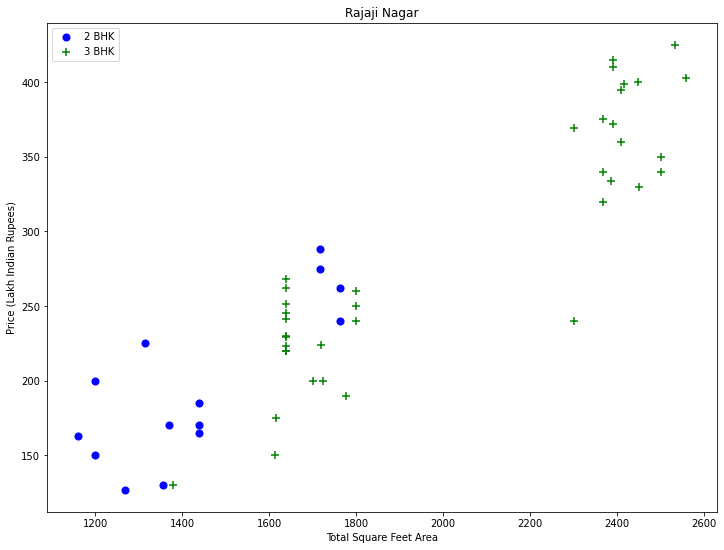

In [95]:
plot_scatter_chart(df4,"Rajaji Nagar")

In [96]:
#use a Standard Deviation technique to remove the outliers from the price_per_sqft.
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7504, 6)

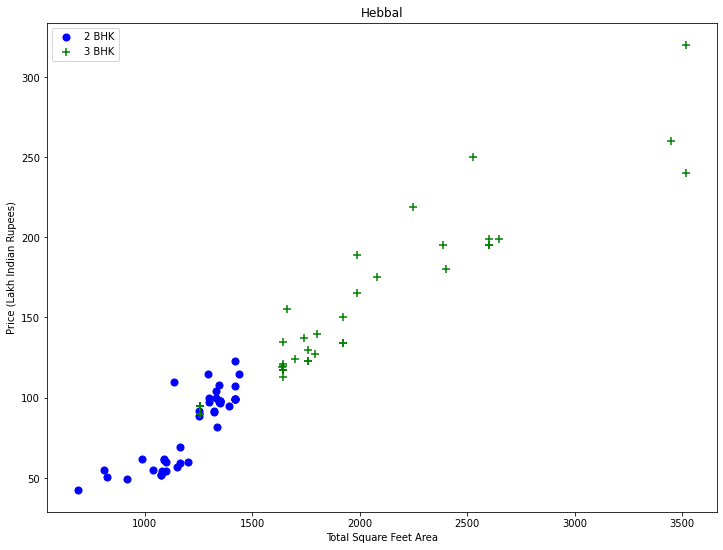

In [97]:
plot_scatter_chart(df5,"Hebbal")

In [98]:
df5.bath.unique()

array([ 3.,  1.,  4.,  2.,  5.,  8.,  9.,  6., 14.,  7., 12.])

In [99]:
df5[df5.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
757,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
6183,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000


Text(0, 0.5, 'Count')

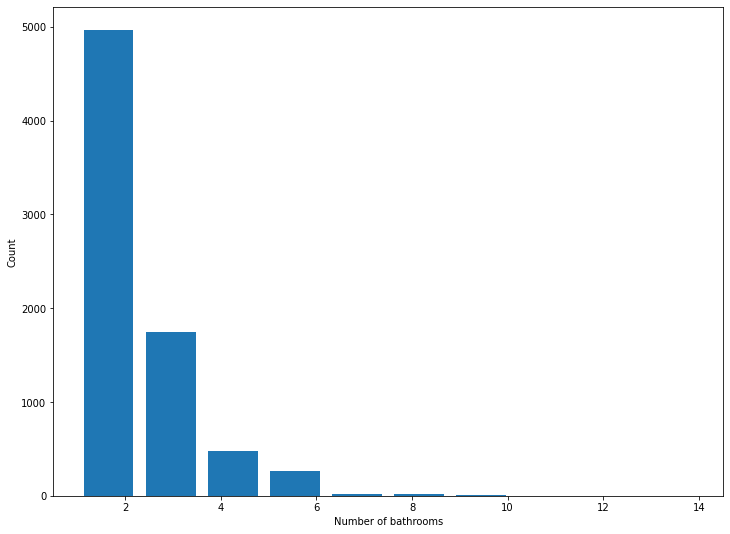

In [100]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [101]:
df5[(df5.bath > df5.bhk+2)]

,location,total_sqft,bath,price,bhk,price_per_sqft
757,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1951,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
6117,Nagasandra,7000.0,8.0,450.0,4,6428.571429
7431,Sathya Sai Layout,11338.0,9.0,1000.0,6,8819.897689
7914,Thanisandra,1806.0,6.0,116.0,3,6423.034330


In [102]:
df6 = df5[~(df5.bath > df5.bhk+2)]
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block BEL Layout,1540.0,3.0,85.0,3,5519.480519
1,1st Block HBR Layout,600.0,1.0,45.0,1,7500.000000
2,1st Block HBR Layout,3150.0,4.0,150.0,4,4761.904762
3,1st Block HRBR Layout,2300.0,3.0,80.0,3,3478.260870
4,1st Block HRBR Layout,1250.0,2.0,67.0,2,5360.000000


In [103]:
df6.shape

(7499, 6)

In [104]:
df7 = df6.drop(['price_per_sqft'],axis='columns')
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block BEL Layout,1540.0,3.0,85.0,3
1,1st Block HBR Layout,600.0,1.0,45.0,1
2,1st Block HBR Layout,3150.0,4.0,150.0,4
3,1st Block HRBR Layout,2300.0,3.0,80.0,3
4,1st Block HRBR Layout,1250.0,2.0,67.0,2


In [105]:
#apply  encoding to convert a categorical feature into numeric feature. And store into a “dummies” data set.
dummies = pd.get_dummies(df7.location)
dummies.head()

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#concate dummies data set with our final data set and remove a “other” column from “dummies” data set
df8 = pd.concat([df7,dummies.drop('tc.palya',axis='columns')],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south
0,1st Block BEL Layout,1540.0,3.0,85.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block HBR Layout,600.0,1.0,45.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block HBR Layout,3150.0,4.0,150.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block HRBR Layout,2300.0,3.0,80.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block HRBR Layout,1250.0,2.0,67.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df8.drop('location',axis='columns',inplace=True)
df8.head()

,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south
0,1540.0,3.0,85.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,45.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3150.0,4.0,150.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2300.0,3.0,80.0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,67.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df8.shape

(7499, 764)

In [109]:
x = df8.drop('price',axis=1)
y = df8['price']

In [110]:
x.shape

(7499, 763)

In [111]:
y.shape

(7499,)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [113]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5999, 763), (1500, 763), (5999,), (1500,))

In [114]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
b=lr.score(X_test,y_test)*100
print("accuracy is",b,"%")

accuracy is -4.28969973404492e+16 %


In [115]:
pred = lr.predict(X_test)
pred

array([279.87288958,  57.58077801, 104.76935603, ..., 439.41994798,
        41.09935644, 133.18294653])

In [116]:
pred = lr.predict(X_test)
pred

array([279.87288958,  57.58077801, 104.76935603, ..., 439.41994798,
        41.09935644, 133.18294653])

In [117]:
location=str(input("location:"))
sqft=float(input("sqft:"))
bath=float(input("bath:"))
bhk=float(input("bhk:"))


def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr.predict([X])[0]

location:Electronic City Phase II
sqft:1440
bath:2
bhk:3


In [118]:
c=predict_price(location,sqft,bath,bhk)
print("predicted price of house is",c,"lakh rupees")
 #predict_price(,1440,2,3)

predicted price of house is 59.352717670604235 lakh rupees


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
